# Final Project: Water Chemistry Data Quality Comparison

### Matt Heinle

There are many sources of water chemistry data available to the public, but how do we decide which datasets are best for our research? In this project, I am comparing the quality of water chemistry data in central New Jersey from the U.S. Geological Survey (USGS) and the Watershed Institute (WSI) based on two criteria:

1) Spatial and Temporal Range
2) Completeness

After that, we will see what statistical information we can get from each dataset in the final section of the project:

3) Visualization and Statistical Analysis

These two sources represent a federal agency with professional scientists who test their samples primarily in a lab, and a private conservation group that depends on trained volunteers for data collection in the field. Both of these data sources have their merits and detractions, so it is important to thoroughly assess the characteristics of each dataset to determine their quality and use cases before undertaking a research project.

## 1. Spatial and Temporal Range

In [4]:
# import necessary packages for visualization
import pandas as pd
import numpy as np
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt

In [5]:
# bring data into pandas dataframes
wsi_sites = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/sites_wsi.csv')
usgs_sites = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/sites_usgs.csv')

wsi_sites source: https://sbmwa.maps.arcgis.com/apps/dashboards/3cec936ab27e4b25b3fa72f00ee36d44

usgs_sites source: https://waterdata.usgs.gov/nj/nwis/inventory?search_criteria=county_cd&search_criteria=site_tp_cd&submitted_form=introduction

In [6]:
wsi_sites.head()

,Site,Latitude,Longitude,Start Date,End Date
0,BB1,40.318355,-74.612535,6/18/1992,5/21/2021
1,BD1,40.419799,-74.639232,6/27/1992,4/20/2018
2,BD2,40.415630,-74.663751,7/17/1993,9/20/2020
3,BD3,40.394541,-74.700893,7/17/1993,1/20/2019
4,BD4,40.384418,-74.740618,7/17/1993,1/19/2020


In [7]:
# wsi dataset is almost ready to use, but we want to see just the year of the first and last sampling date, and then calculate the temporal range of each site

# convert dates to datetime
wsi_sites['Start Date'] = pd.to_datetime(wsi_sites['Start Date'])
wsi_sites['End Date'] = pd.to_datetime(wsi_sites['End Date'])

# create and populate year columns
wsi_sites['StartYear'] = wsi_sites['Start Date'].dt.year
wsi_sites['EndYear'] = wsi_sites['End Date'].dt.year

# create and populate range column
wsi_sites['DateRange'] = wsi_sites['EndYear'] - wsi_sites['StartYear']

In [8]:
wsi_sites.head()

,Site,Latitude,Longitude,Start Date,End Date,StartYear,EndYear,DateRange
0,BB1,40.318355,-74.612535,1992-06-18,2021-05-21,1992,2021,29
1,BD1,40.419799,-74.639232,1992-06-27,2018-04-20,1992,2018,26
2,BD2,40.415630,-74.663751,1993-07-17,2020-09-20,1993,2020,27
3,BD3,40.394541,-74.700893,1993-07-17,2019-01-20,1993,2019,26
4,BD4,40.384418,-74.740618,1993-07-17,2020-01-19,1993,2020,27


In [9]:
# usgs dataset still contains NA values
usgs_sites.head()

,site_no,dec_lat_va,dec_long_va,qw_begin_date,qw_end_date
0,1378671.0,40.741528,-74.549028,11/6/2019,8/31/2022
1,1378680.0,40.744694,-74.565611,6/20/2006,8/7/2007
2,1378685.0,40.741389,-74.551111,NaN,NaN
3,1378690.0,40.733611,-74.540000,4/15/1965,5/7/2009
4,1378700.0,40.719167,-74.530833,4/20/1962,9/23/1963


In [10]:
# remove columns with NA values
usgs_sites = usgs_sites.loc[usgs_sites.qw_begin_date.notna() & usgs_sites.qw_end_date.notna()]
# now we can perform the same operation to get the temporal range as we did with wsi_sites

# convert dates to datetime
usgs_sites['qw_end_date'] = pd.to_datetime(usgs_sites['qw_end_date'])
usgs_sites['qw_begin_date'] = pd.to_datetime(usgs_sites['qw_begin_date'])

# create and populate year columns
usgs_sites['StartYear'] = usgs_sites['qw_begin_date'].dt.year
usgs_sites['EndYear'] = usgs_sites['qw_end_date'].dt.year

# create and populate range column
usgs_sites['DateRange'] = usgs_sites['EndYear'] - usgs_sites['StartYear']

In [11]:
# that's better
usgs_sites.head()

,site_no,dec_lat_va,dec_long_va,qw_begin_date,qw_end_date,StartYear,EndYear,DateRange
0,1378671.0,40.741528,-74.549028,2019-11-06,2022-08-31,2019,2022,3
1,1378680.0,40.744694,-74.565611,2006-06-20,2007-08-07,2006,2007,1
3,1378690.0,40.733611,-74.540000,1965-04-15,2009-05-07,1965,2009,44
4,1378700.0,40.719167,-74.530833,1962-04-20,1963-09-23,1962,1963,1
7,1378850.0,40.713611,-74.516111,1962-04-20,1965-09-08,1962,1965,3


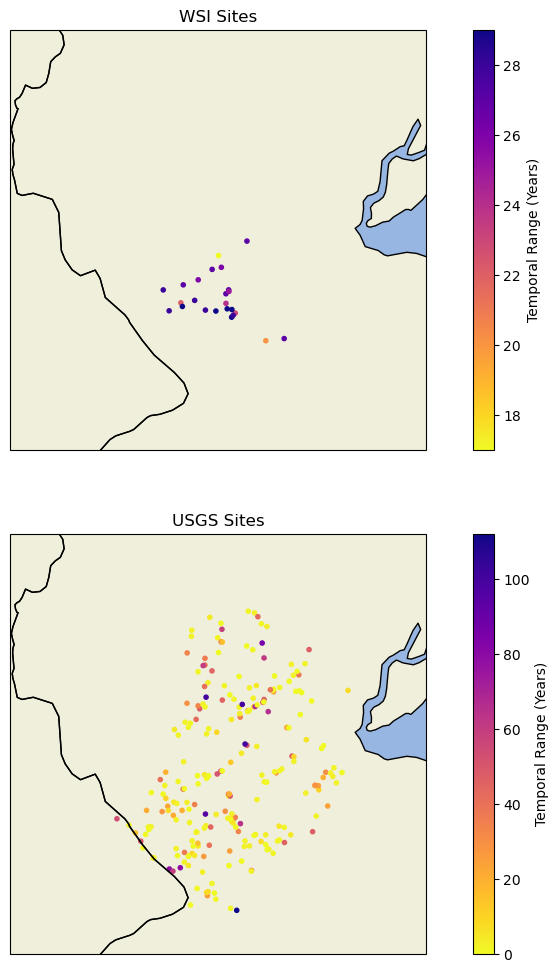

In [12]:
# now we can display the spatial range of each dataset
# define map extent
extent = [-75.2, -74.1, 40.05, 40.9]

# make basemaps
fig, ax = plt.subplots(nrows = 2,
                       figsize = (12,12),
                       subplot_kw = {'projection':ccrs.UTM(zone = 18)},) # UTM zone 18N is the most accurate conformal projection for New Jersey
for x in ax:
    x.set_extent(extent)
    x.add_feature(cfeature.STATES)
    x.add_feature(cfeature.OCEAN)
    x.add_feature(cfeature.LAND)

# plot wsi data
wsi = ax[0].scatter(x = wsi_sites.Longitude,
              y = wsi_sites.Latitude,
              c = wsi_sites.DateRange,
              cmap = 'plasma_r',
              marker = '.',
              transform = ccrs.PlateCarree())
fig.colorbar(wsi, ax = ax[0], label = 'Temporal Range (Years)')
ax[0].title.set_text('WSI Sites')

# plot usgs data
usgs = ax[1].scatter(x = usgs_sites.dec_long_va,
              y = usgs_sites.dec_lat_va,
              c = usgs_sites.DateRange,
              cmap = 'plasma_r',
              marker = '.',
              transform = ccrs.PlateCarree())
fig.colorbar(usgs, ax = ax[1], label = 'Temporal Range (Years)')
ax[1].title.set_text('USGS Sites')

*NOTE: color bars are scaled differently

Based on the above plots, it is clear that the spatial range of WSI water chemistry sampling sites is smaller than that of USGS, but the temporal range of the WSI sites is more consistent. Many of the USGS sites were sampled for a very short period of time, so the larger dataset may be misleading. If a researcher is looking to assess water chemistry trends across a small watershed, the WSI data is likely a better choice. That said, the USGS data may be more appropriate for examining trends at individual stations over a very long time period (sometimes over 100 years), or taking snapshots of water chemistry across the entire state, but at intervals that are constrained by the availability of data.

## 2. Completeness

Now, we will compare data from two sampling sites (one from each dataset) that have been collecting data from the Millstone River during the same time period in order to assess the completeness of each dataset.

#### USGS: Site 01402000

Lat: 40.475

Lon: -74.576

Filename: waterquality_usgs_millstone.csv

Source: https://waterdata.usgs.gov/monitoring-location/01402000/#parameterCode=00065&period=P7D&showMedian=true

#### WSI: Site MR3

Lat: 40.407

Lon: -74.637

Filename: waterquality_wsi_millstone.csv

Source: https://sbmwa.maps.arcgis.com/apps/dashboards/3cec936ab27e4b25b3fa72f00ee36d44

In [13]:
# bring data into pandas dataframes
usgs_ms = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/waterquality_usgs_millstone.csv',
                      parse_dates = ['DATE'],
                      index_col = ['DATE'])

wsi_ms = pd.read_csv('/home/mjh367/rcaes/rcaes_finalproject_mattheinle/waterquality_wsi_millstone.csv',
                     parse_dates = ['Date'],
                     index_col = ['Date'])

# It should be noted that the USGS data includes many more water chemistry parameters than the WSI, and both datasets include more parameters than are contained in these dataframes.

In [14]:
# truncate dataframes to have the same date range
startdate = '2000-01-01'
enddate = '2020-12-31'

usgs_ms = usgs_ms.loc[startdate:enddate]
wsi_ms = wsi_ms.loc[startdate:enddate]

In [15]:
# usgs dataset looks good to go (we'll address the NaN values later)
usgs_ms.head()

,SITENO,WATERTEMP,AIRTEMP,DOMGL,DOPS,PHFIELD,PHLAB,NO3,NN,PO4
DATE,,,,,,,,,,
2000-02-01,1402000,1.0,NaN,12.3,87.0,7.7,7.3,4.24,4.27,0.29
2000-05-24,1402000,15.0,NaN,9.1,91.0,7.2,7.4,1.23,1.26,0.12
2000-05-24,1402000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-28,1402000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-03,1402000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# wsi dataset uses '99' to indicate NaN value, and includes values below, within, or above detection limits with <, =, > qualifiers
wsi_ms.head()

,Site,Air Temperature,Water Temperature,Nitrate,NIT_GL,Phosphate,PHOS_GL,pH,PH_GL,Turbidity,TURB_GL,Average Dissolved Oxygen
Date,,,,,,,,,,,,
2000-01-23,MR3,16.0,14.0,1.6,=,0.2,<,7.0,NaN,99,<,11.80
2000-02-05,MR3,14.0,9.0,0.2,=,0.2,<,6.8,NaN,99,<,12.00
2000-02-19,MR3,10.0,10.0,0.6,=,0.2,<,6.0,NaN,99,<,12.00
2000-03-04,MR3,25.0,12.0,0.8,=,0.2,<,6.0,NaN,99,<,12.00
2000-03-19,MR3,99.0,99.0,0.5,=,0.2,<,6.0,NaN,99,=,10.75


In [17]:
# replace 99 with NaN
wsi_ms = wsi_ms.replace(99, np.nan)

# replace '<' values with NaN
wsi_ms.loc[wsi_ms.NIT_GL == '<','Nitrate'] = np.NaN
wsi_ms.loc[wsi_ms.PHOS_GL == '<','Phosphate'] = np.NaN
wsi_ms.loc[wsi_ms.PH_GL == '<','pH'] = np.NaN
wsi_ms.loc[wsi_ms.TURB_GL == '<','Turbidity'] = np.NaN

# that's better
wsi_ms.head()

,Site,Air Temperature,Water Temperature,Nitrate,NIT_GL,Phosphate,PHOS_GL,pH,PH_GL,Turbidity,TURB_GL,Average Dissolved Oxygen
Date,,,,,,,,,,,,
2000-01-23,MR3,16.0,14.0,1.6,=,NaN,<,7.0,NaN,NaN,<,11.80
2000-02-05,MR3,14.0,9.0,0.2,=,NaN,<,6.8,NaN,NaN,<,12.00
2000-02-19,MR3,10.0,10.0,0.6,=,NaN,<,6.0,NaN,NaN,<,12.00
2000-03-04,MR3,25.0,12.0,0.8,=,NaN,<,6.0,NaN,NaN,<,12.00
2000-03-19,MR3,NaN,NaN,0.5,=,NaN,<,6.0,NaN,NaN,=,10.75


Now that our datasets are cleaned up, let's assess how complete they are within the target date range.

In [18]:
# define a function to calculate percentage of usable data
def completeness(dataset, parameter):
    '''function to calculate percentage of non-NaN data'''
    obs = dataset[parameter].count()
    total = len(dataset[parameter])
    return round((obs / total) * 100, 1)

In [19]:
# create list of columns and iterate through completeness function
usgs_cols = ['NO3', 'PO4', 'PHFIELD', 'DOMGL']

for col in usgs_cols:
    print(col, completeness(usgs_ms, col), '%')

NO3 16.0 %
PO4 64.1 %
PHFIELD 67.2 %
DOMGL 67.2 %


In [20]:
# create list of columns and iterate through completeness function
wsi_cols = ['Nitrate', 'Phosphate', 'pH', 'Average Dissolved Oxygen']

for col in wsi_cols:
    print(col, completeness(wsi_ms, col), '%')

Nitrate 83.9 %
Phosphate 58.3 %
pH 98.6 %
Average Dissolved Oxygen 97.2 %


For the Millstone River during this time period, the data is generally more complete in the WSI dataset than the USGS one. This process could be repeated across other time periods, sampling sites, and parameters in order to find the best data for a given analysis.

## 3. Visualization and Statistical Analysis

There is a lot of information we might want to extract these datasets, so let's assess their potential uses by looking at basic visualization of the data.

Text(0.5, 0, 'Time')

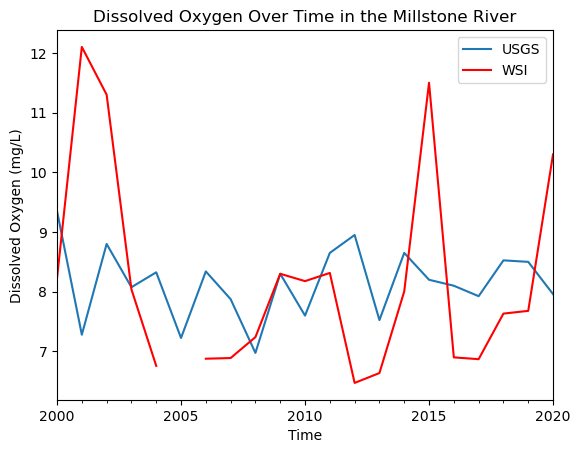

In [21]:
# make plots of dissolved oxygen, resampled by year
fig, ax = plt.subplots()

# plot data
usgs_ms['DOMGL'].resample('Y').mean().plot()
wsi_ms['Average Dissolved Oxygen'].resample('Y').mean().plot(color = 'red')

# plot surrounds
plt.title('Dissolved Oxygen Over Time in the Millstone River')
plt.legend(['USGS', 'WSI'])
ax.set_ylabel('Dissolved Oxygen (mg/L)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

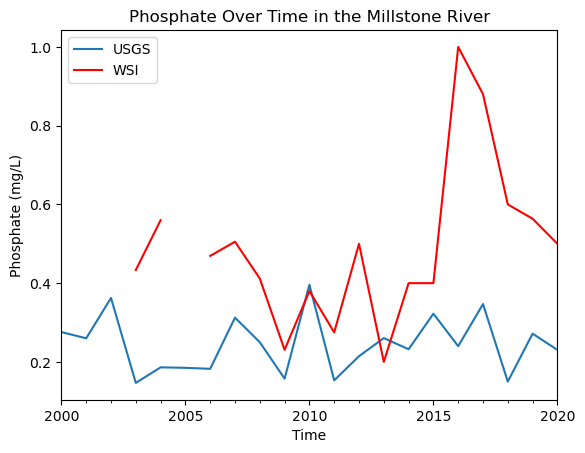

In [22]:
# make plots of phosphate, resampled by year
fig, ax = plt.subplots()

# plot data
usgs_ms['PO4'].resample('Y').mean().plot()
wsi_ms['Phosphate'].resample('Y').mean().plot(color = 'red')

# plot surrounds
plt.title('Phosphate Over Time in the Millstone River')
plt.legend(['USGS', 'WSI'])
ax.set_ylabel('Phosphate (mg/L)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

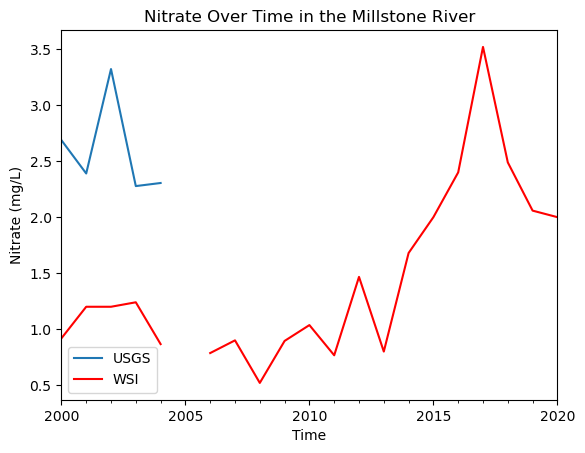

In [23]:
# make plots of nitrate, resampled by year
fig, ax = plt.subplots()

# plot data
usgs_ms['NO3'].resample('Y').mean().plot()
wsi_ms['Nitrate'].resample('Y').mean().plot(color = 'red')

# plot surrounds
plt.title('Nitrate Over Time in the Millstone River')
plt.legend(['USGS', 'WSI'])
ax.set_ylabel('Nitrate (mg/L)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

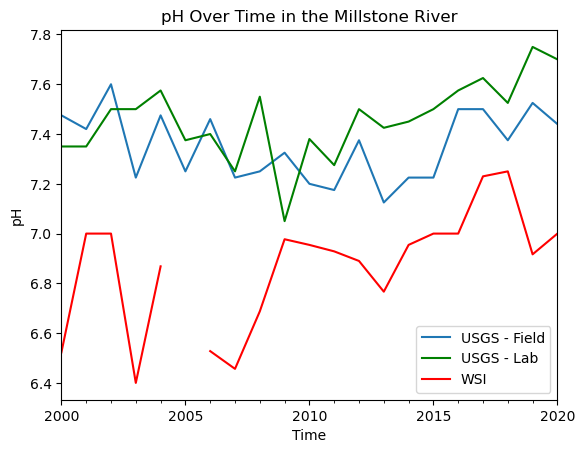

In [24]:
# make plots of pH, resampled by year
fig, ax = plt.subplots()

# plot data
usgs_ms['PHFIELD'].resample('Y').mean().plot()
usgs_ms['PHLAB'].resample('Y').mean().plot(color = 'green')
wsi_ms['pH'].resample('Y').mean().plot(color = 'red')

# plot surrounds
plt.title('pH Over Time in the Millstone River')
plt.legend(['USGS - Field', 'USGS - Lab', 'WSI'])
ax.set_ylabel('pH')
ax.set_xlabel('Time')

There are clearly discrepancies between the values measured by the USGS and the WSI. Which of these datasets is more accurate is not possible to determine for sure, but we can examine the precision of the measurements.

In [26]:
# create dataframe of standard deviations of yearly pH measurements
stdevs = pd.DataFrame()

# populate with data
stdevs['usgs_pH'] = usgs_ms.PHFIELD.resample('Y').std()
stdevs['wsi_pH'] = wsi_ms.pH.resample('Y').std()
stdevs['year'] = stdevs.index.year

Text(0.5, 0, 'Year')

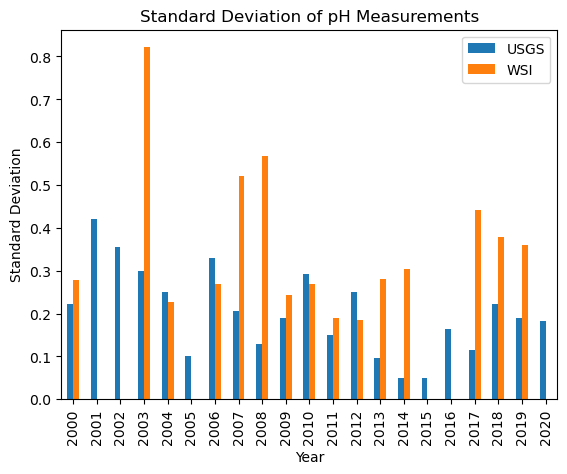

In [27]:
# plot data as a grouped bar plot
ax = stdevs.plot(kind='bar', x='year')

# plot surrounds
plt.title('Standard Deviation of pH Measurements')
plt.legend(['USGS', 'WSI'])
ax.set_ylabel('Standard Deviation')
ax.set_xlabel('Year')

The standard deviations of the measurements from the WSI are consistently higher than the USGS measurements, so the USGS data may be more precise.

## Conclusions

The goal of this project is to show the diversity of water chemistry data that is available to the public and assess its quality. Through this project, we demonstrated that the data from the U.S. Geological survey has greater spatial and temporal ranges than the Watershed Institute data overall, as well as better precision of measurement in general. That said, the data from the Watershed Institute is collected more consistently and has higher resolution in its area of focus compared to the USGS data. In the end, both of these groups are valuable resources for water chemistry data in New Jersey, and depending on the type of research being performed, there is justification for using either of the datasets.